In [16]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset("titanic")
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [46]:
## 경고 메시지 표시 안함
import warnings
warnings.filterwarnings(action='ignore')

In [47]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
age2           0
family         0
dtype: int64

In [48]:
## age 변수를 중앙값으로 대치
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [49]:
##embarked 가판정보 열의 결측값을 최빈값으로 치환하기
titanic['embarked'].value_counts()


S    646
C    168
Q     77
Name: embarked, dtype: int64

ChatGPT
value_counts()는 Pandas Series에서 각 고유 값의 빈도수를 반환하는 메서드입니다. 

따라서 titanic['embarked'].value_counts()는 
'embarked' 열에 있는 고유 값들의 빈도수를 나타내는 Series를 반환합니다.

여기서:

'embarked': 선착장(Embarkation) 정보를 나타내는 열입니다.
value_counts(): 해당 열에 있는 각 고유 값의 빈도수를 계산합니다.

결과는 각 선착장(Embarkation) 값의 빈도수가 높은 순서대로 정렬된 Series가 반환됩니다. 
이를 통해 각 선착장에 몇 명의 승객이 탑승했는지를 확인할 수 있습니다.

In [50]:
titanic['embarked'] = titanic['embarked'].fillna('S')

In [51]:
titanic['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [52]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [24]:
titanic['deck'] = titanic['deck'].fillna('C')

In [53]:
titanic_corr = titanic.corr(method='pearson')
titanic_corr

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,age2,family
survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367,-0.052184,0.016639
pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207,-0.339368,0.065997
sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.908578,0.303646,0.074415,-0.200988
age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647,0.975345,-0.245619
sibsp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471,-0.227286,0.890712
parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398,-0.158476,0.783111
fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832,0.100123,0.217138
adult_male,-0.557080,0.094035,0.908578,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744,0.223350,-0.348143
alone,-0.203367,0.135207,0.303646,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000,0.155459,-0.690922
age2,-0.052184,-0.339368,0.074415,0.975345,-0.227286,-0.158476,0.100123,0.223350,0.155459,1.000000,-0.234514


In [26]:
titanic_corr.to_csv('titanic_corr.csv', index=False)

In [27]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [28]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [29]:
import matplotlib.pyplot as plt

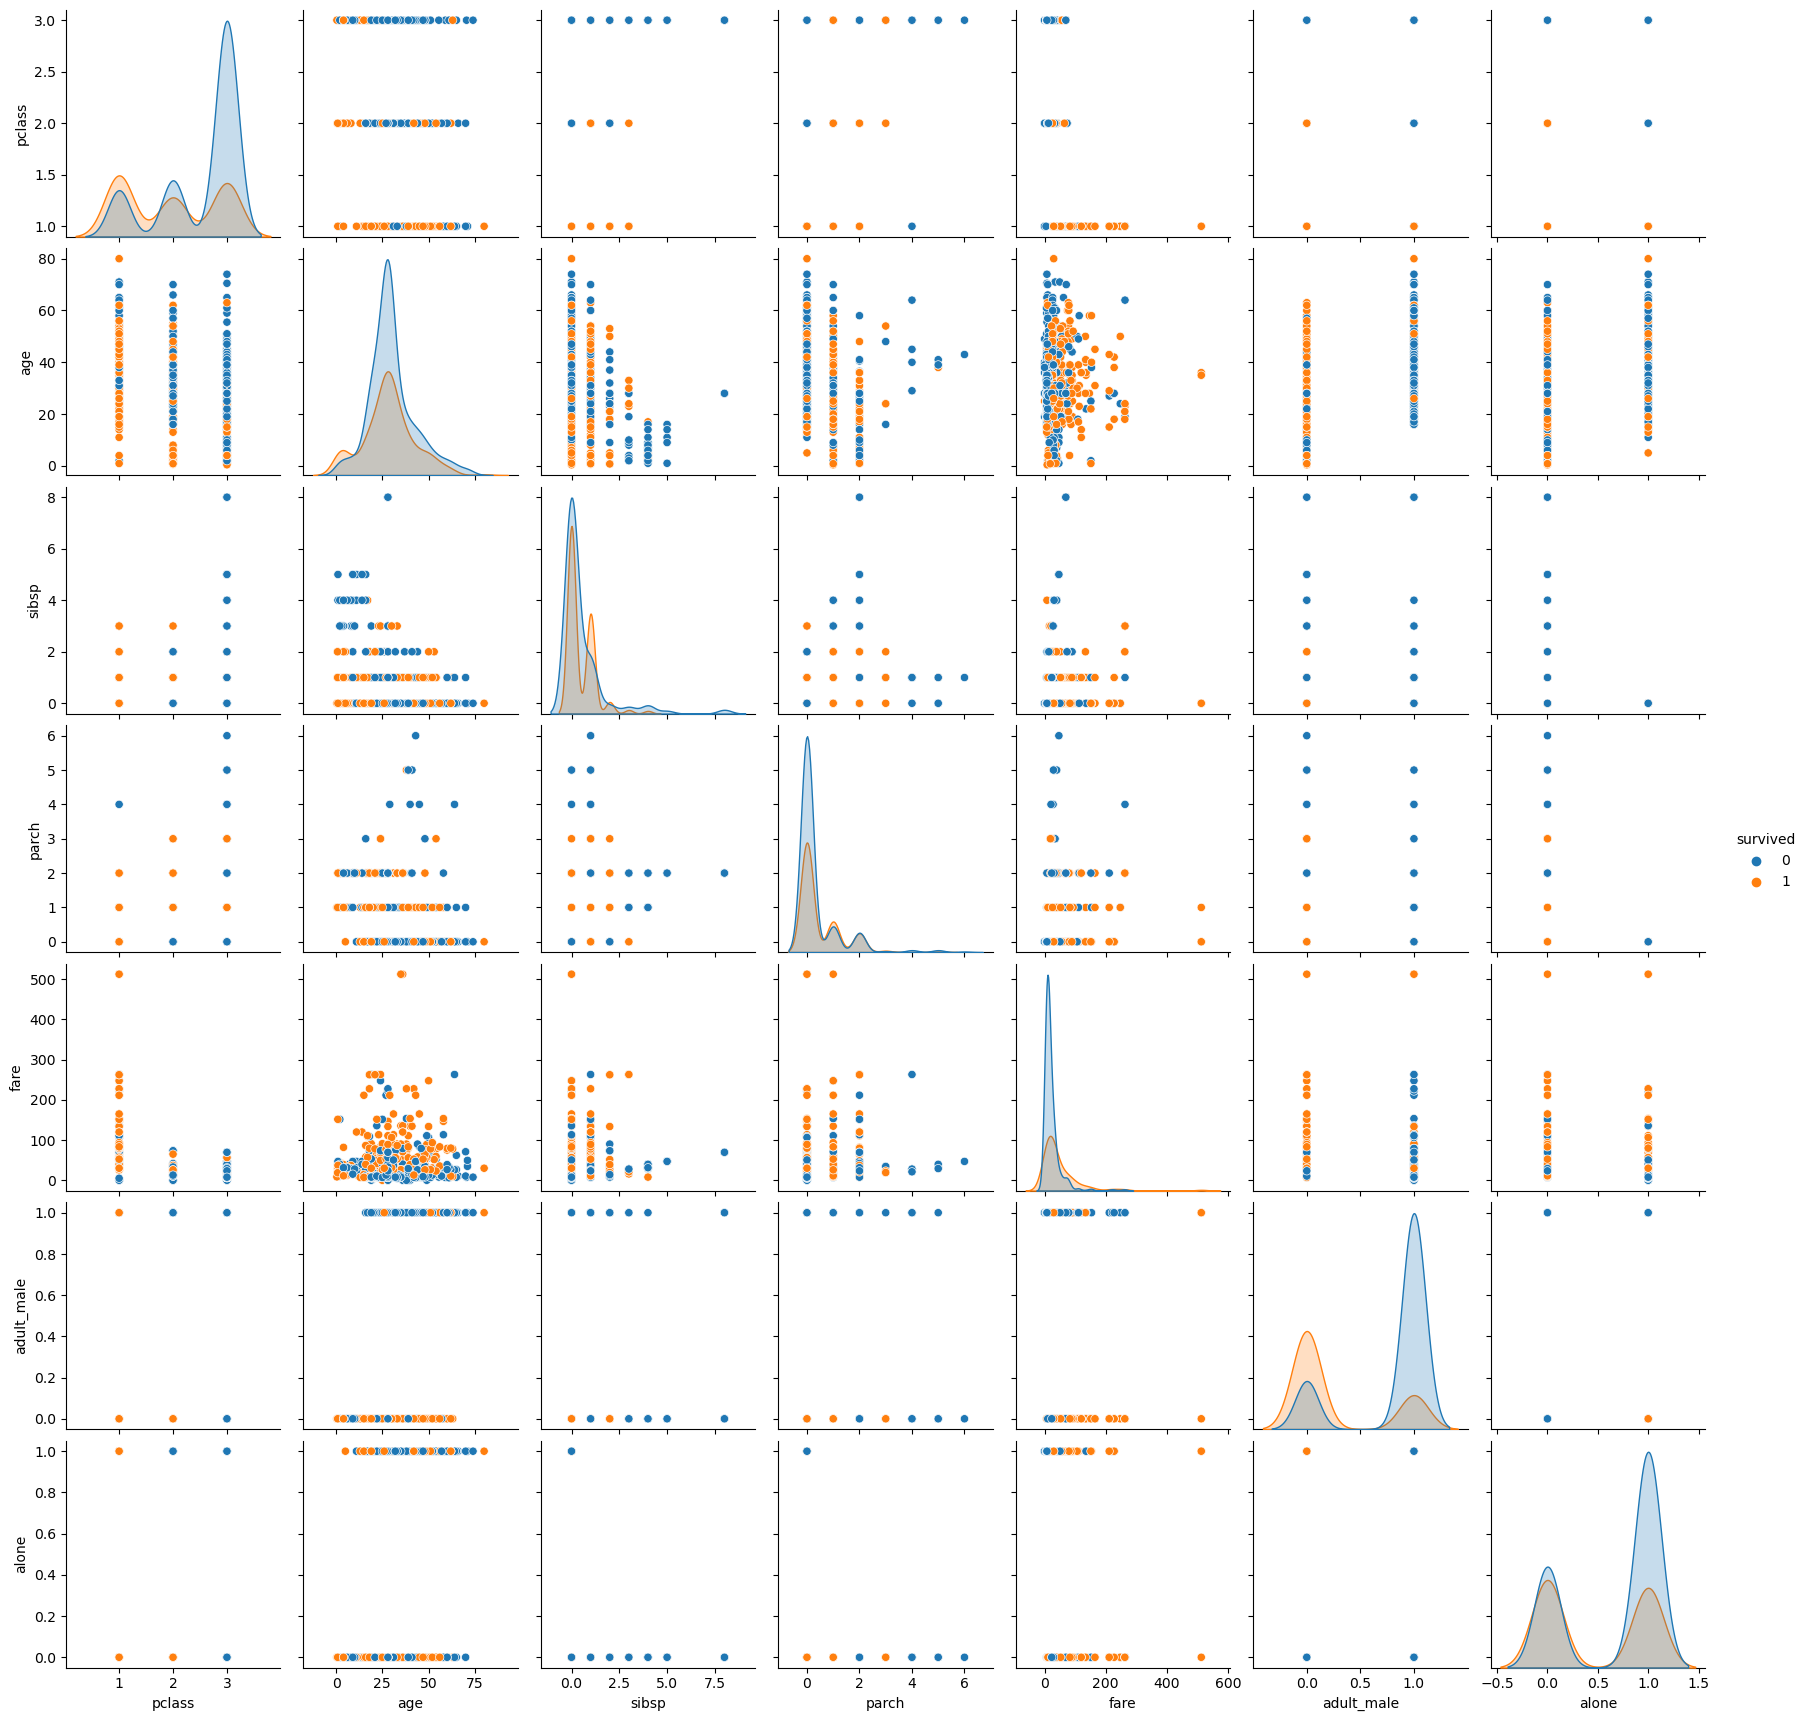

In [30]:
sns.pairplot(titanic,hue='survived')
plt.show()

In [31]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053258

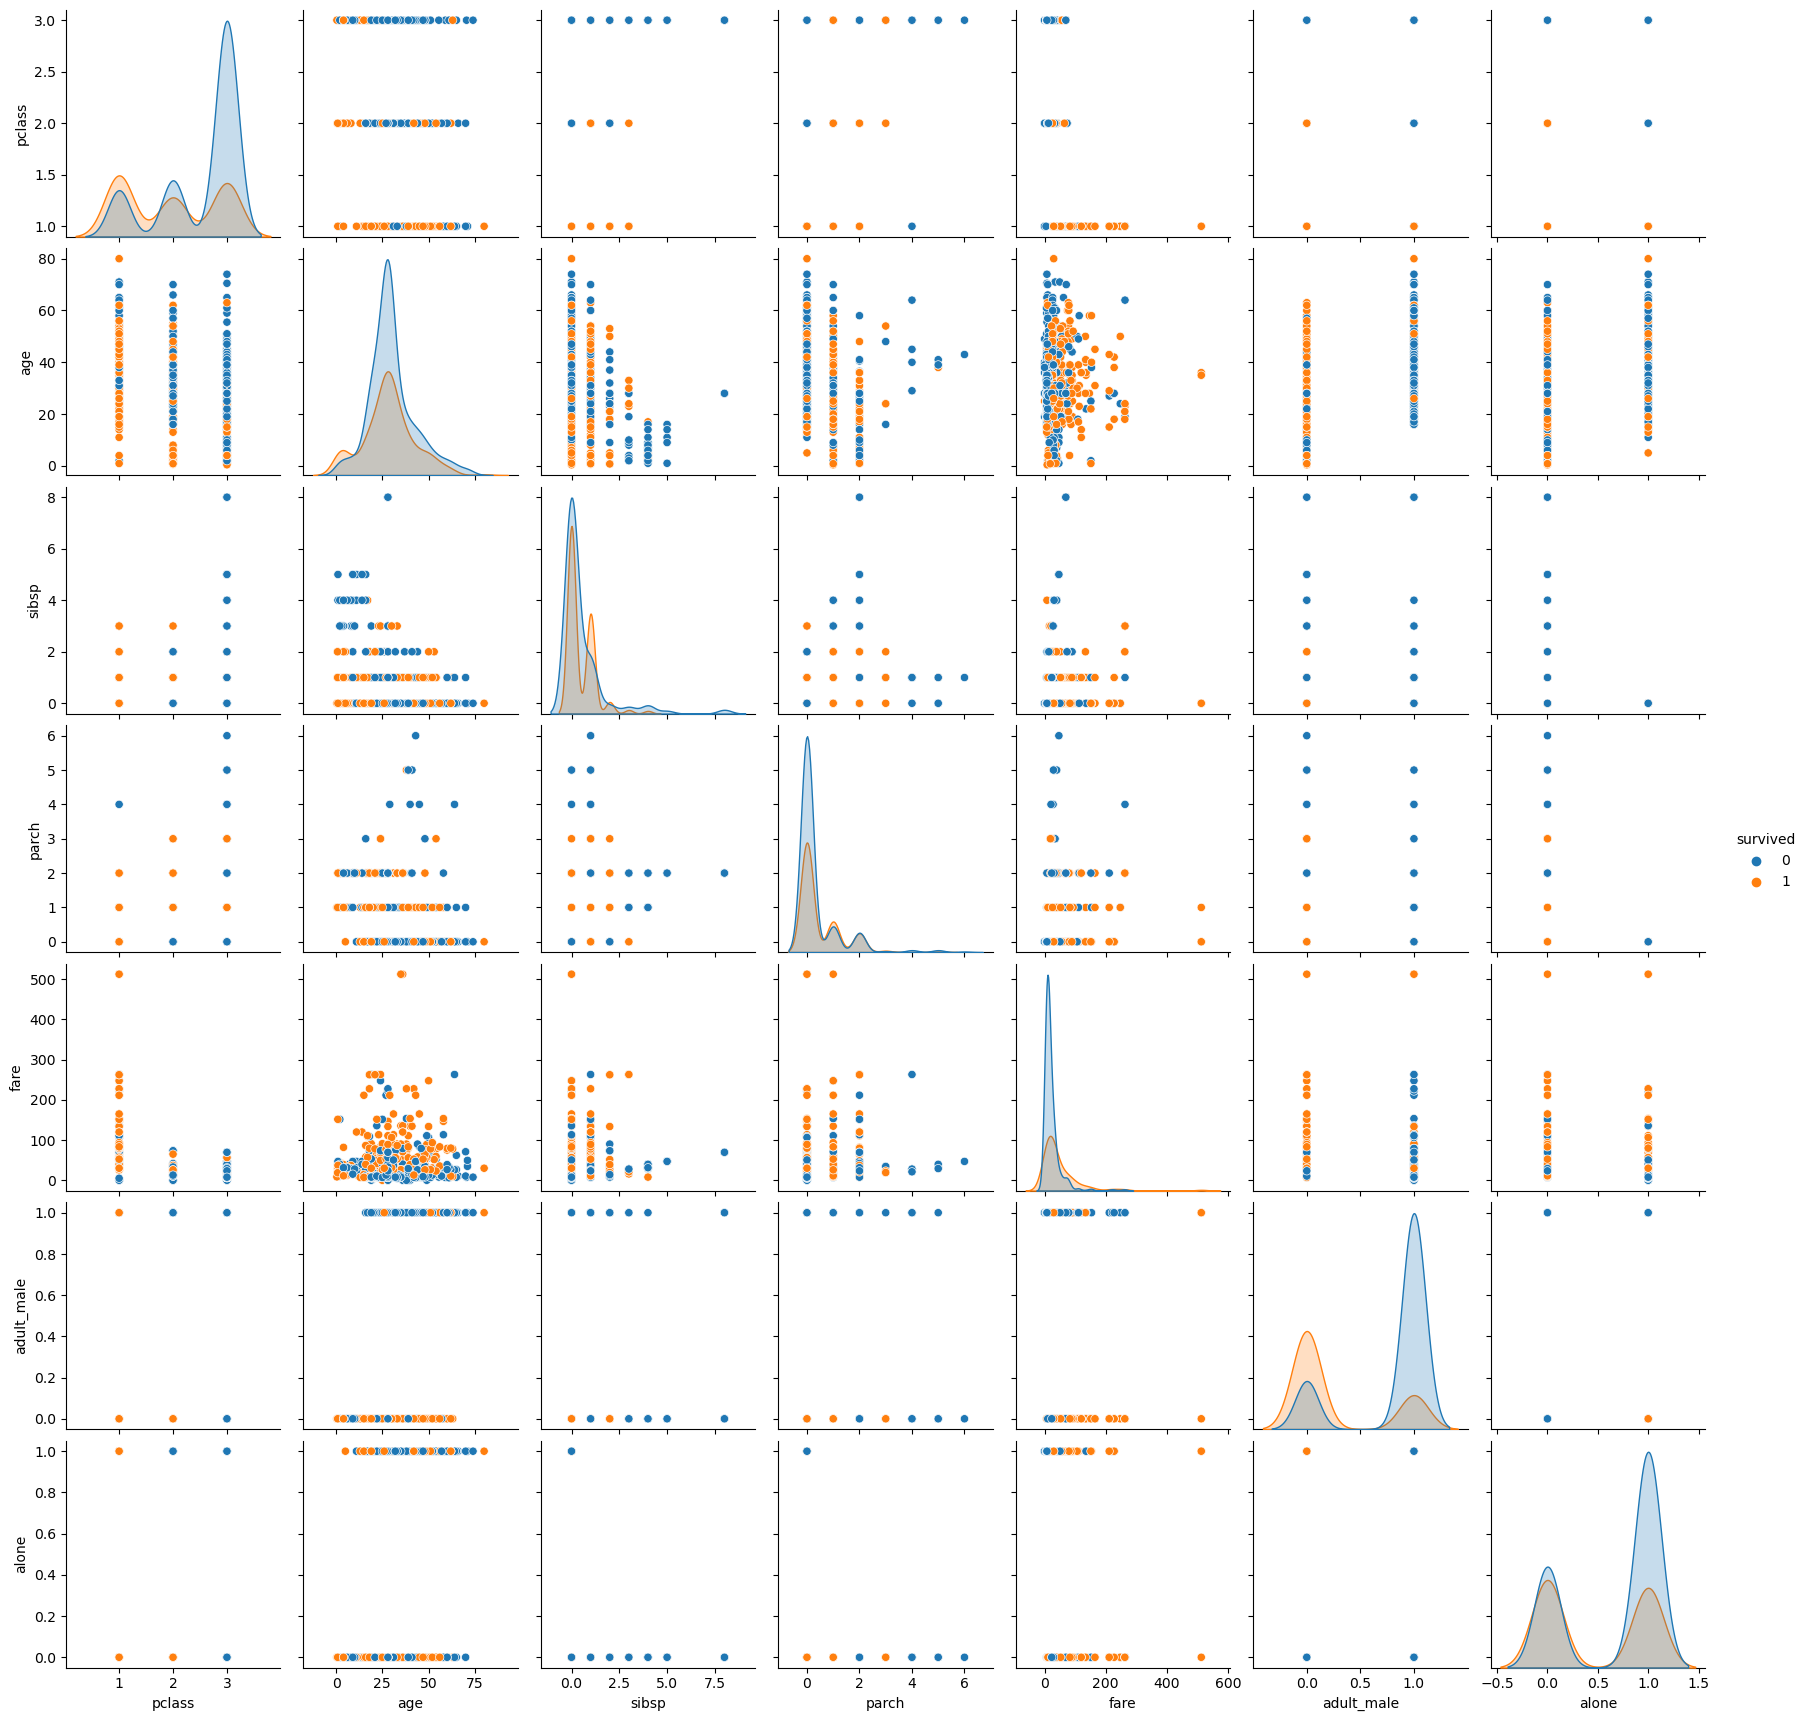

In [33]:
sns.pairplot(titanic,hue='survived')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

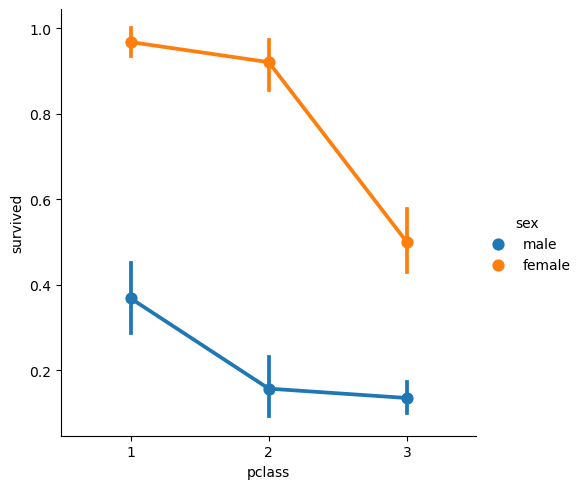

In [34]:
sns.catplot(x='pclass', y='survived', hue='sex', data = titanic,kind='point')
# 범주형 데이터를 시각화
#catplot : 범주형 변수들 간의 관계를 확인할 때 활용
#pclass를 x축, survived를 축으로 설정하고, 
# 성별에 따라 다른 색상으로 점을 찍어 각 클래스와 생존 여부에 대한 관계를 시각화 

### kind='point' : point 대신, swarm, violin, bar 등을 사용할 수 있다. 

plt.show

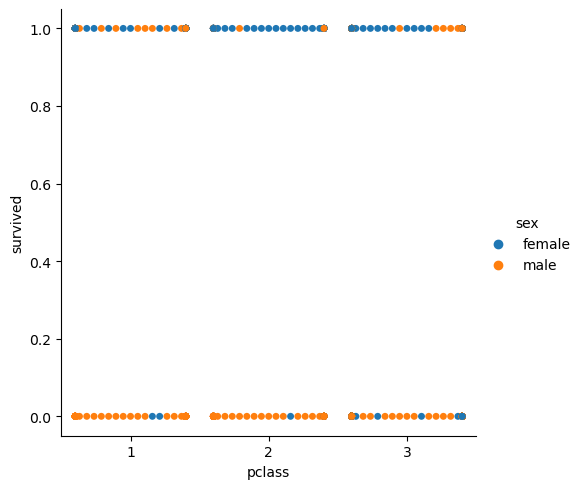

In [35]:
sns.catplot(x='pclass', y='survived', hue='sex', data = titanic,kind='swarm')

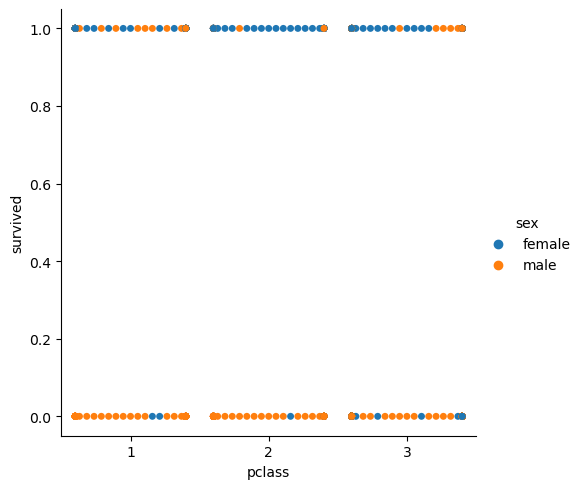

In [36]:
sns.catplot(x='pclass', y='survived', hue='sex', data = titanic,kind='swarm')

In [37]:
## 히트맵

In [38]:
def category_age(x):
    if x< 10:
        return 0
    elif x < 20 : 
        return 1
    elif x < 30 : 
        return 2
    elif x < 40 : 
        return 3
    elif x < 50 : 
        return 4
    elif x < 60 : 
        return 5
    elif x < 70 : 
        return 6
    else:
        return 7

In [39]:
titanic['age2'] = titanic['age'].apply(category_age)

In [40]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2


In [41]:
titanic['sex'] = titanic['sex'].map({'male':1,'female':0}) # 성별을 1.0으로
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,0,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2


In [42]:
titanic['family']= titanic['sibsp']+ titanic['parch']+1

#가족의 수를 구하여 family에 추가 
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2,1
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,1
888,0,3,0,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2,4
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2,1


In [43]:
titanic.to_csv('titanic3.csv',index=False)

In [44]:
heatmap_data = titanic[['survived','sex','age2','family','pclass','fare']]

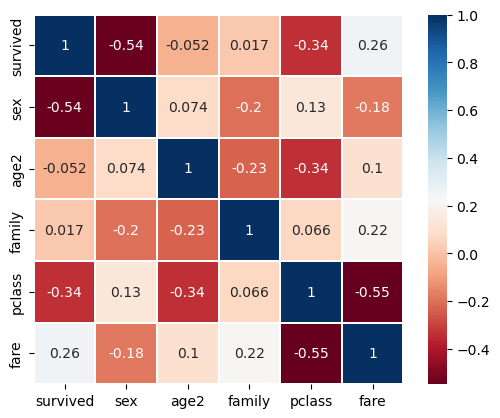

In [45]:
colormap = plt.cm.RdBu  # 컬러 맵
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1 , square = True, cmap=colormap, linecolor = 'white', annot=True)
plt.show()

In [ ]:
## 2. 